In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.optimize import minimize_scalar

In [51]:
def U(A, B, alpha=1/3):
    return .125 * (A*(B+3))
#     return ((B+3)**alpha * A**(1-alpha))

def A_indifference(B, ubar, alpha=1/3):
    print("this")
    return ubar/(.125 * (B+3))
#   return ubar**(1/(1-alpha)) * (B+3)**(-alpha/(1-alpha))

def runItAll(utility_func, a_indifference, budget, price_ratio):

    def plot_indif(ax, utility, alpha=1/3):
        label = "U="+str(utility)
        ax.plot(B, a_indifference(B, utility, alpha), label=label)
        ax.legend(loc='best')

    def plot_indifference_curves(ax, alpha=1/3):
        ubar = np.arange(1, 11, 2)
        for i in ubar:
            plot_indif(ax, i)
        ax.set_xlabel("B")
        ax.set_ylabel(r"$A(B, \bar{U}$)")
        
    def A_bc(B, budget, price_ratio):
        "Given B, W, and pa return the max amount of A our consumer can afford"
        print(budget, " - ", B, " / ", price_ratio, " = ", (budget - B) / price_ratio)
        return (budget - B) / price_ratio

    def plot_budget_constraint(ax, budget, price_ratio):
        B_bc = np.array([0, budget])
        A = A_bc(B_bc, budget, price_ratio)
        ax.plot(B_bc, A)
        ax.fill_between(B_bc, 0, A, alpha=0.2)
        ax.set_xlabel("B")
        ax.set_ylabel("A")
        return ax
    
    def optimal(budget, price_ratio):
        def objective(B, budget, price_ratio):
            """
            Return value of -U for a given B, when we consume as much A as possible

            Note that we return -U because scipy wants to minimize functions,
            and the value of B that minimizes -U will maximize U
            """
            A = A_bc(B, budget, price_ratio)
            return -utility_func(A, B)
        
        def objective_with_params(B):
            return objective(B, budget, price_ratio)

        result = minimize_scalar(objective_with_params, bounds=(0, 10), method='bounded')
        optimal_B = result.x
        optimal_A = A_bc(optimal_B, budget, price_ratio)
        optimal_U = utility_func(optimal_A, optimal_B)

        print("The optimal U is ", optimal_U)
        print("and was found at (A,B) =", (optimal_A, optimal_B))
        return {'utility': optimal_U, 'A': optimal_A, 'B': optimal_B}


    def plot_point(ax, a, b):
        ax.plot([b], [a], marker='o', markersize=3, color="red")        
                
    B = np.linspace(1, 20, 100).reshape((100, 1))
    fig, ax = plt.subplots()
    plot_budget_constraint(ax, budget, price_ratio)
    plot_indifference_curves(ax)
    opt = optimal(budget, price_ratio)
    plot_point(ax, opt['A'], opt['B'])
    plot_indif(ax, opt['utility'])

Next Steps
- Put U and A_indif into nice params (or maybe `pass` functions)
- Real world example
- Python UI!

10  -  [ 0 10]  /  1  =  [10.  0.]
this
this
this
this
this
10  -  3.819660112501051  /  1  =  6.180339887498949
10  -  6.180339887498947  /  1  =  3.8196601125010528
10  -  2.360679774997897  /  1  =  7.639320225002103
10  -  3.5  /  1  =  6.5
10  -  3.500003385246723  /  1  =  6.499996614753277
10  -  3.499996614753277  /  1  =  6.500003385246723
10  -  3.5  /  1  =  6.5
The optimal U is  5.28125
and was found at (A,B) = (6.5, 3.5)
this


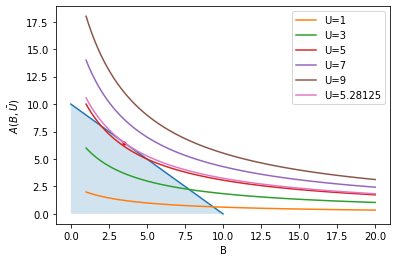

In [55]:
runItAll(utility_func=U, a_indifference=A_indifference, budget=10, price_ratio=1)

120  -  [  0 120]  /  1.25  =  [96.  0.]
120  -  3.819660112501051  /  1.25  =  92.94427190999916
120  -  6.180339887498947  /  1.25  =  91.05572809000084
120  -  7.639320225002102  /  1.25  =  89.88854381999832
120  -  8.541019662496845  /  1.25  =  89.16718427000252
120  -  9.098300562505257  /  1.25  =  88.7213595499958
120  -  9.442719099991587  /  1.25  =  88.44582472000673
120  -  9.65558146251367  /  1.25  =  88.27553482998907
120  -  9.787137637477919  /  1.25  =  88.17028989001767
120  -  9.868443825035753  /  1.25  =  88.1052449399714
120  -  9.918693812442168  /  1.25  =  88.06504495004626
120  -  9.949750012593586  /  1.25  =  88.04019998992513
120  -  9.968943799848581  /  1.25  =  88.02484496012114
120  -  9.980806212745003  /  1.25  =  88.015355029804
120  -  9.988137587103578  /  1.25  =  88.00948993031713
120  -  9.992668625641427  /  1.25  =  88.00586509948685
120  -  9.995468961462151  /  1.25  =  88.00362483083028
120  -  9.997199664179274  /  1.25  =  88.0022402686

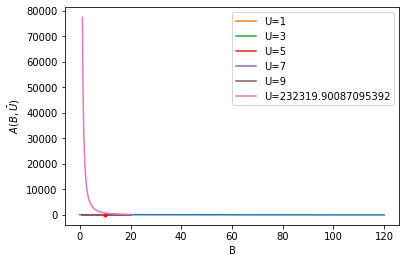

In [54]:
def U2(burger, beer):
    res = (3*beer) * (burger**2)
    return res

# this is really only used for the graph not for optimizing
def A_indifference2(y, ubar, alpha=1/3):
    return ubar/(3*y**2)
#     return (ubar/y) ** 100
    
burger_price = 5
beer_price = 4
budget = 120
    
runItAll(utility_func=U2, 
         a_indifference=A_indifference2, 
         budget=budget, 
         price_ratio=burger_price / beer_price)